## Project Introduction

The **Uber Trip Analysis** project analyzes large-scale Uber trip data from New York City to uncover travel patterns and accurately forecast future ride demand. The study applies data analysis, time-series techniques, and machine learning to identify peak hours, high-demand days, and long-term demand trends. Advanced models such as **Random Forest** and **XGBoost** are used to improve prediction accuracy, enabling better operational planning, resource optimization, and data-driven decision-making for ride-sharing platforms.


-------

## Project Structure

1. **Project Overview**  
   Define the objective, scope, tools, and expected outcomes of the Uber Trip Analysis project.

2. **Dataset Understanding**  
   Describe the data source, time period, size, and key columns used in the analysis.

3. **Data Collection & Loading**  
   Download raw CSV files and load them into Python using Pandas.

4. **Data Preprocessing**  
   Clean the data, handle missing values, convert date-time fields, and prepare time-series data.

5. **Exploratory Data Analysis (EDA)**  
   Analyze trip patterns, peak hours, daily trends, and seasonality using visualizations.

6. **Feature Engineering**  
   Create lag features and time-based variables to capture temporal dependencies.

7. **Train–Test Split**  
   Split data based on time to avoid data leakage in forecasting models.

8. **Model Building**  
   Train machine learning models such as XGBoost, Random Forest, and Gradient Boosting.

9. **Hyperparameter Tuning**  
   Optimize model performance using GridSearchCV with TimeSeriesSplit.

10. **Model Evaluation**  
    Evaluate models using MAPE and compare prediction accuracy.

11. **Ensemble Modeling**  
    Combine multiple models to improve stability and performance.

12. **Results & Insights**  
    Summarize key findings, model performance, and business implications.

13. **Conclusion & Future Scope**  
    Conclude results and suggest improvements or extensions for future work.


---

## 1. Project Overview

### Objective
The primary goal of this project is to analyze Uber trip data to understand travel patterns and predict future ride demand using machine learning techniques.

### Scope
- Analyze trip patterns across different days and time periods
- Identify peak demand hours and seasonal trends
- Build predictive models for trip demand forecasting
- Compare multiple machine learning algorithms for accuracy

### Tools & Technologies
- **Python** - Primary programming language
- **Pandas & NumPy** - Data manipulation and analysis
- **Matplotlib & Seaborn** - Data visualization
- **Scikit-learn** - Machine learning algorithms and evaluation
- **XGBoost** - Gradient boosting implementation

### Expected Outcomes
1. Understanding of Uber trip demand patterns in NYC
2. Accurate prediction models for future trip demand
3. Actionable insights for operational planning
4. Model comparison and performance benchmarks

# Uber Trip Analysis  
**Created by:** Piyush Ramteke


-----

## 2. Dataset Understanding

### Data Source
The dataset is sourced from the NYC Taxi & Limousine Commission (TLC) FOIL (Freedom of Information Law) request data, containing Uber trip records.

### Time Period
- **Coverage:** January - February 2015
- **Granularity:** Daily aggregated data per dispatching base

### Dataset Size
- **Rows:** 354 records
- **Columns:** 4 features

### Key Columns
| Column | Description |
|--------|-------------|
| `dispatching_base_number` | Unique identifier for the Uber base |
| `date` | Date of the trips |
| `active_vehicles` | Number of vehicles active on that day |
| `trips` | Total number of trips completed |

## 3. Data Collection & Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Uber-Jan-Feb-FOIL Uber Trip Analysis.csv')

# Display first few rows
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


## 4. Data Preprocessing

In [2]:
# Check data info
df.info()

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df = df.sort_values(by='date')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [3]:
# Check for duplicates
print(f"Duplicates: {df.duplicated().sum()}")

Duplicates: 0


In [4]:
# Check for missing values
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64


## 5. Exploratory Data Analysis (EDA)

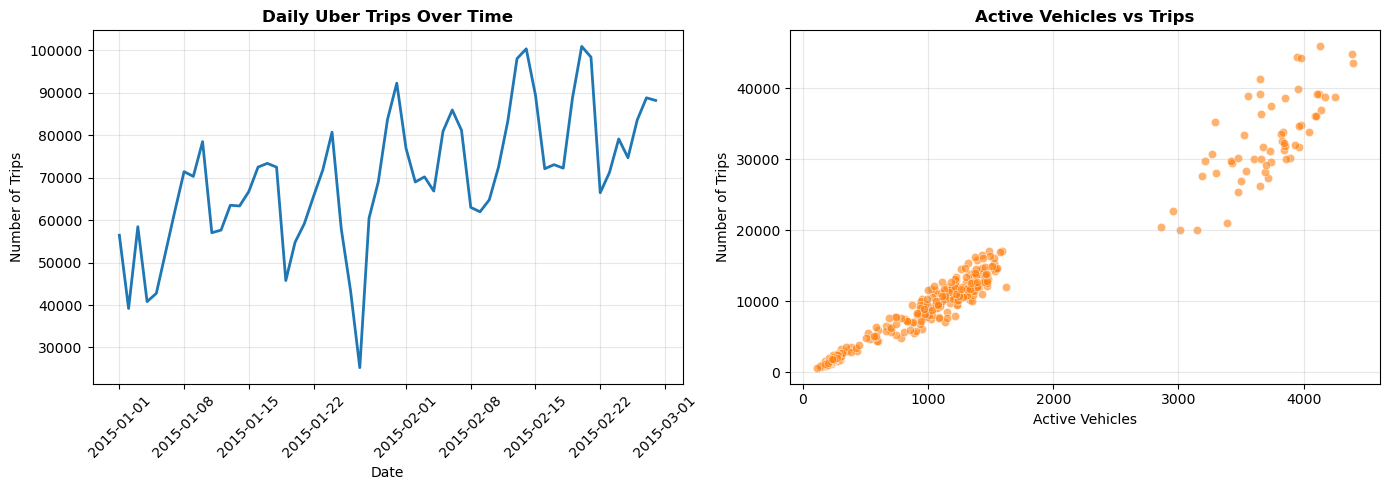

Correlation between Active Vehicles and Trips: 0.9805


In [5]:
# Aggregate daily trips across all bases
daily_trips = df.groupby('date').agg({
    'trips': 'sum',
    'active_vehicles': 'sum'
}).reset_index()

# Plot 1: Daily Uber Trips Trend
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(daily_trips['date'], daily_trips['trips'], color='#1f77b4', linewidth=2)
plt.title('Daily Uber Trips Over Time', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Plot 2: Active Vehicles vs Trips (Correlation)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='active_vehicles', y='trips', alpha=0.6, color='#ff7f0e')
plt.title('Active Vehicles vs Trips', fontsize=12, fontweight='bold')
plt.xlabel('Active Vehicles')
plt.ylabel('Number of Trips')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['active_vehicles'].corr(df['trips'])
print(f"Correlation between Active Vehicles and Trips: {correlation:.4f}")

C:\Users\Piyu\AppData\Local\Temp\ipykernel_24764\358010530.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=base_trips.values, y=base_trips.index, palette='viridis')


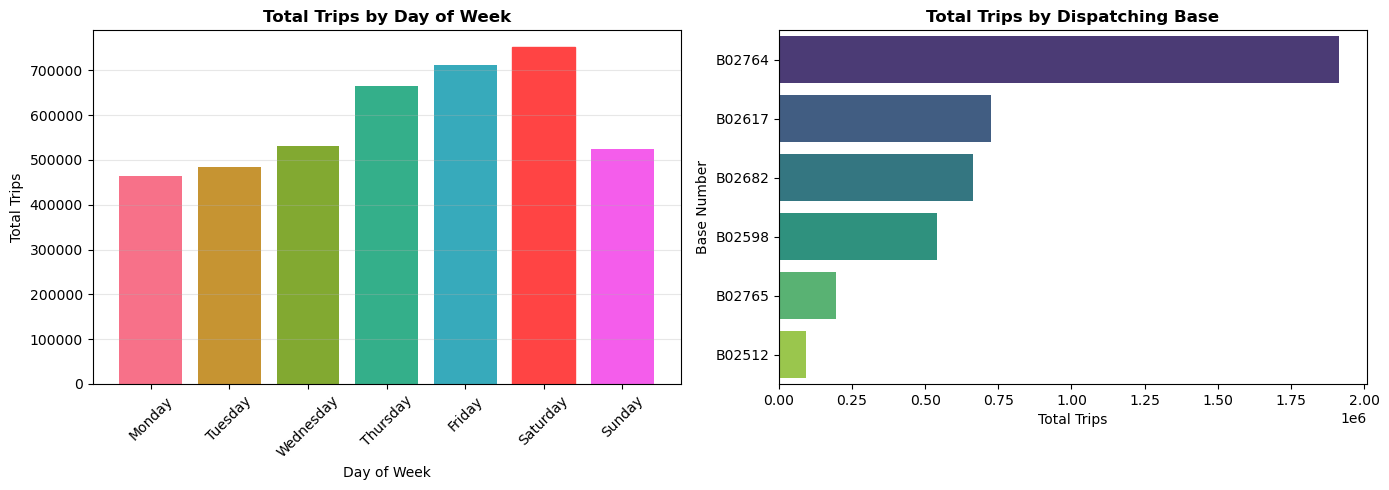


📊 EDA Insights:
   - Peak Day: Saturday with 751,325 total trips
   - Busiest Base: B02764 with 1,914,449 trips


In [6]:
# Create day of week for analysis
df['day_of_week'] = df['date'].dt.day_name()
df['day_of_week_num'] = df['date'].dt.dayofweek

# Daily trips aggregated by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_agg = df.groupby('day_of_week')['trips'].sum().reindex(day_order)

# Plot 3: Trips by Day of Week
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
colors = sns.color_palette("husl", 7)
bars = plt.bar(daily_agg.index, daily_agg.values, color=colors)
plt.title('Total Trips by Day of Week', fontsize=12, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Total Trips')
plt.xticks(rotation=45)

# Highlight peak day
max_idx = daily_agg.values.argmax()
bars[max_idx].set_color('#ff4444')
plt.grid(True, alpha=0.3, axis='y')

# Plot 4: Trips Distribution by Base
plt.subplot(1, 2, 2)
base_trips = df.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False)
sns.barplot(x=base_trips.values, y=base_trips.index, palette='viridis')
plt.title('Total Trips by Dispatching Base', fontsize=12, fontweight='bold')
plt.xlabel('Total Trips')
plt.ylabel('Base Number')

plt.tight_layout()
plt.show()

# Print insights
print(f"\n📊 EDA Insights:")
print(f"   - Peak Day: {daily_agg.idxmax()} with {daily_agg.max():,.0f} total trips")
print(f"   - Busiest Base: {base_trips.idxmax()} with {base_trips.max():,.0f} trips")

### Seasonality Analysis

---

## 6. Feature Engineering

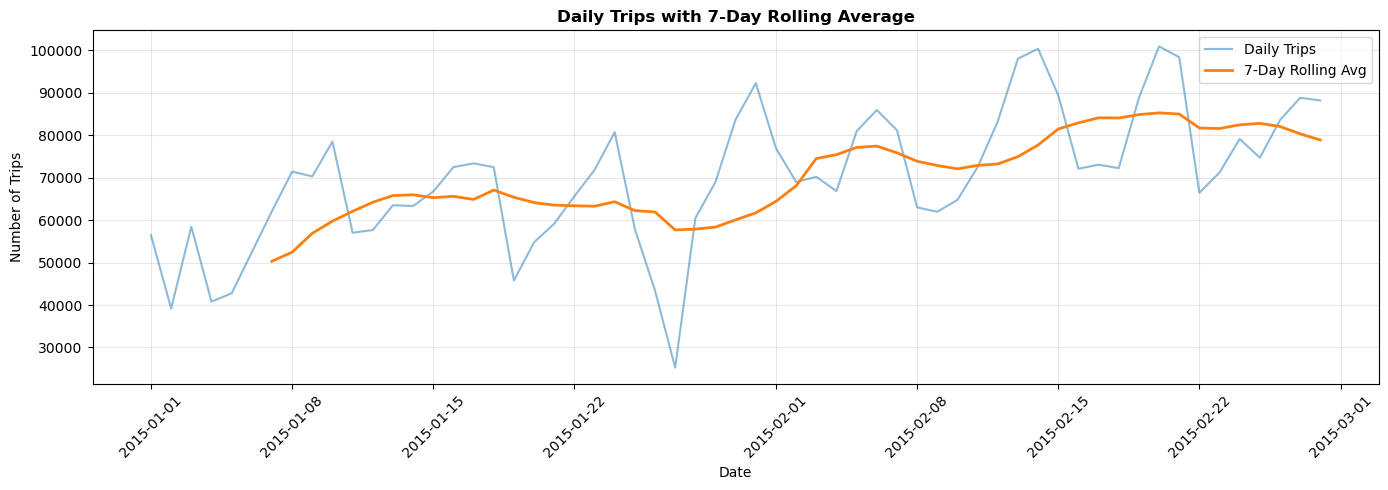

C:\Users\Piyu\AppData\Local\Temp\ipykernel_24764\835562815.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='day_of_week', y='trips', order=day_order, palette='Set2')


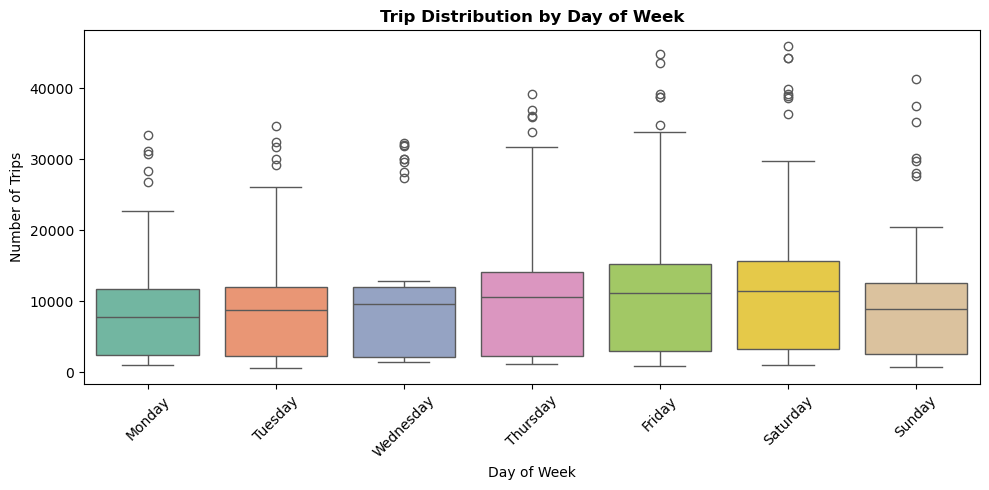

In [7]:
# Rolling average to see trend
daily_trips['rolling_7d'] = daily_trips['trips'].rolling(window=7).mean()

plt.figure(figsize=(14, 5))

# Plot: Daily trips with 7-day rolling average
plt.plot(daily_trips['date'], daily_trips['trips'], alpha=0.5, label='Daily Trips', color='#1f77b4')
plt.plot(daily_trips['date'], daily_trips['rolling_7d'], linewidth=2, label='7-Day Rolling Avg', color='#ff7f0e')
plt.title('Daily Trips with 7-Day Rolling Average', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Box plot for weekly patterns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='day_of_week', y='trips', order=day_order, palette='Set2')
plt.title('Trip Distribution by Day of Week', fontsize=12, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# Aggregate data by date for time series modeling
df_ts = df.groupby('date').agg({
    'trips': 'sum',
    'active_vehicles': 'sum'
}).reset_index()

# Time-based features
df_ts['day_of_week'] = df_ts['date'].dt.day_name()
df_ts['day_of_week_num'] = df_ts['date'].dt.dayofweek
df_ts['month'] = df_ts['date'].dt.month
df_ts['day'] = df_ts['date'].dt.day
df_ts['is_weekend'] = df_ts['day_of_week_num'].isin([5, 6]).astype(int)

# Lag features for time series forecasting
df_ts['lag_1'] = df_ts['trips'].shift(1)  # Yesterday's trips
df_ts['lag_7'] = df_ts['trips'].shift(7)  # Same day last week
df_ts['lag_14'] = df_ts['trips'].shift(14)  # Two weeks ago

# Rolling statistics
df_ts['rolling_mean_7'] = df_ts['trips'].shift(1).rolling(window=7).mean()
df_ts['rolling_std_7'] = df_ts['trips'].shift(1).rolling(window=7).std()

# Drop NaN values created by shifting
df_ts = df_ts.dropna()

print(f"Features created: {df_ts.columns.tolist()}")
print(f"\nDataset shape after feature engineering: {df_ts.shape}")
df_ts.head()

Features created: ['date', 'trips', 'active_vehicles', 'day_of_week', 'day_of_week_num', 'month', 'day', 'is_weekend', 'lag_1', 'lag_7', 'lag_14', 'rolling_mean_7', 'rolling_std_7']

Dataset shape after feature engineering: (45, 13)


,date,trips,active_vehicles,day_of_week,day_of_week_num,month,day,is_weekend,lag_1,lag_7,lag_14,rolling_mean_7,rolling_std_7
14,2015-01-15,66729,8080,Thursday,3,1,15,0,63329.0,71413.0,56437.0,65956.142857,7824.152892
15,2015-01-16,72480,8273,Friday,4,1,16,0,66729.0,70296.0,39189.0,65287.000000,7472.058663
16,2015-01-17,73363,7527,Saturday,5,1,17,1,72480.0,78484.0,58449.0,65599.000000,7756.263319
17,2015-01-18,72473,6863,Sunday,6,1,18,1,73363.0,57026.0,40798.0,64867.428571,6473.893956
18,2015-01-19,45755,5945,Monday,0,1,19,0,72473.0,57646.0,42752.0,67074.142857,5968.492507


## 7. Train-Test Split

In [9]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Time-based split (Train: first 80%, Test: last 20%)
train_size = int(len(df_ts) * 0.8)
train, test = df_ts.iloc[:train_size], df_ts.iloc[train_size:]

print(f"Training set: {train['date'].min()} to {train['date'].max()}")
print(f"Test set: {test['date'].min()} to {test['date'].max()}")
print(f"\nTrain size: {len(train)} samples")
print(f"Test size: {len(test)} samples")

# Features and Target
features = ['day_of_week_num', 'day', 'is_weekend', 'lag_1', 'lag_7', 'lag_14', 
            'rolling_mean_7', 'rolling_std_7', 'active_vehicles']
target = 'trips'

X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

print(f"\nFeatures used: {features}")

Training set: 2015-01-15 00:00:00 to 2015-02-19 00:00:00
Test set: 2015-02-20 00:00:00 to 2015-02-28 00:00:00

Train size: 36 samples
Test size: 9 samples

Features used: ['day_of_week_num', 'day', 'is_weekend', 'lag_1', 'lag_7', 'lag_14', 'rolling_mean_7', 'rolling_std_7', 'active_vehicles']


## 8. Model Building

In [10]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

# Initialize models
models = {
    'XGBoost': XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=500,
        max_depth=10,
        random_state=42,
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.1,
        max_depth=5,
        random_state=42
    )
}

# Train all models
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    
print("\n✅ All models trained successfully!")

Training XGBoost...
Training Random Forest...
Training Gradient Boosting...

✅ All models trained successfully!


## 9. Hyperparameter Tuning

In [11]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for XGBoost using TimeSeriesSplit
param_grid_xgb = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15]
}

tscv = TimeSeriesSplit(n_splits=3)

print("Tuning XGBoost hyperparameters...")
grid_search_xgb = GridSearchCV(
    estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid_xgb,
    cv=tscv,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    verbose=0
)
grid_search_xgb.fit(X_train, y_train)

print(f"\n📊 Best XGBoost Parameters: {grid_search_xgb.best_params_}")
print(f"Best CV Score (neg MAPE): {grid_search_xgb.best_score_:.4f}")

# Store best model
best_xgb = grid_search_xgb.best_estimator_
trained_models['XGBoost (Tuned)'] = best_xgb

Tuning XGBoost hyperparameters...

📊 Best XGBoost Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500}
Best CV Score (neg MAPE): -0.1521


## 10. Model Evaluation

In [12]:
# Evaluation function
def evaluate_model(y_true, y_pred, name):
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return {'Model': name, 'MAPE (%)': mape, 'RMSE': rmse}

# Generate predictions and evaluate all models
results = []
predictions = {}

for name, model in trained_models.items():
    pred = model.predict(X_test)
    predictions[name] = pred
    results.append(evaluate_model(y_test, pred, name))

# Display results as DataFrame
results_df = pd.DataFrame(results).sort_values('MAPE (%)')
print("📈 Model Performance Comparison:\n")
print(results_df.to_string(index=False))

# Find best model
best_model_name = results_df.iloc[0]['Model']
print(f"\n🏆 Best Performing Model: {best_model_name}")

📈 Model Performance Comparison:

            Model  MAPE (%)        RMSE
    Random Forest  7.355077 6520.006282
  XGBoost (Tuned)  8.595064 8261.153430
          XGBoost 10.043284 9325.432322
Gradient Boosting 10.885496 9663.131567

🏆 Best Performing Model: Random Forest


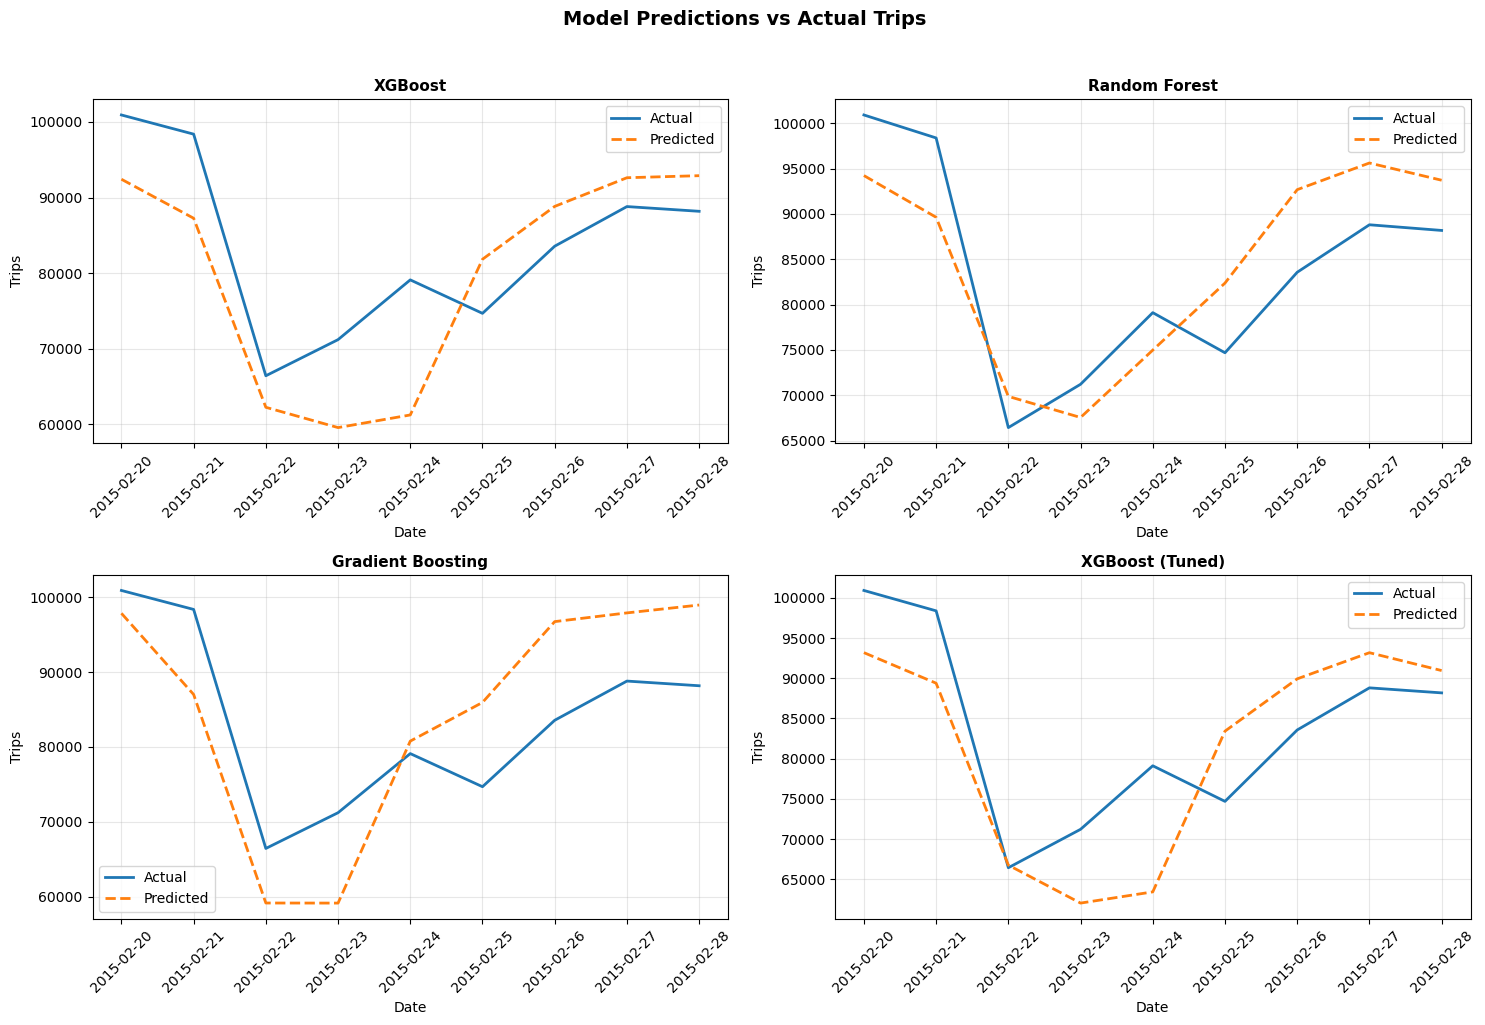

In [13]:
# Visualization of predictions vs actual
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, (name, pred) in enumerate(predictions.items()):
    if idx < 4:
        ax = axes[idx]
        ax.plot(test['date'], y_test.values, label='Actual', color='#1f77b4', linewidth=2)
        ax.plot(test['date'], pred, label='Predicted', color='#ff7f0e', linestyle='--', linewidth=2)
        ax.set_title(f'{name}', fontsize=11, fontweight='bold')
        ax.set_xlabel('Date')
        ax.set_ylabel('Trips')
        ax.legend()
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)

plt.suptitle('Model Predictions vs Actual Trips', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 11. Ensemble Modeling

In [14]:
# Ensemble: Weighted averaging based on inverse MAPE
weights = {}
for result in results:
    weights[result['Model']] = 1 / result['MAPE (%)']

# Normalize weights
total_weight = sum(weights.values())
weights = {k: v/total_weight for k, v in weights.items()}

print("📊 Ensemble Weights (based on inverse MAPE):")
for model, weight in weights.items():
    print(f"   {model}: {weight:.3f}")

# Create weighted ensemble prediction
ensemble_pred = np.zeros(len(y_test))
for name, pred in predictions.items():
    ensemble_pred += weights[name] * pred

# Evaluate ensemble
ensemble_result = evaluate_model(y_test, ensemble_pred, "Weighted Ensemble")
print(f"\n🔗 Ensemble Performance:")
print(f"   MAPE: {ensemble_result['MAPE (%)']:.2f}%")
print(f"   RMSE: {ensemble_result['RMSE']:.2f}")

# Also try simple average
simple_avg = np.mean(list(predictions.values()), axis=0)
simple_result = evaluate_model(y_test, simple_avg, "Simple Average Ensemble")
print(f"\n📊 Simple Average Ensemble:")
print(f"   MAPE: {simple_result['MAPE (%)']:.2f}%")
print(f"   RMSE: {simple_result['RMSE']:.2f}")

📊 Ensemble Weights (based on inverse MAPE):
   XGBoost: 0.224
   Random Forest: 0.306
   Gradient Boosting: 0.207
   XGBoost (Tuned): 0.262

🔗 Ensemble Performance:
   MAPE: 8.54%
   RMSE: 7538.28

📊 Simple Average Ensemble:
   MAPE: 8.79%
   RMSE: 7679.96


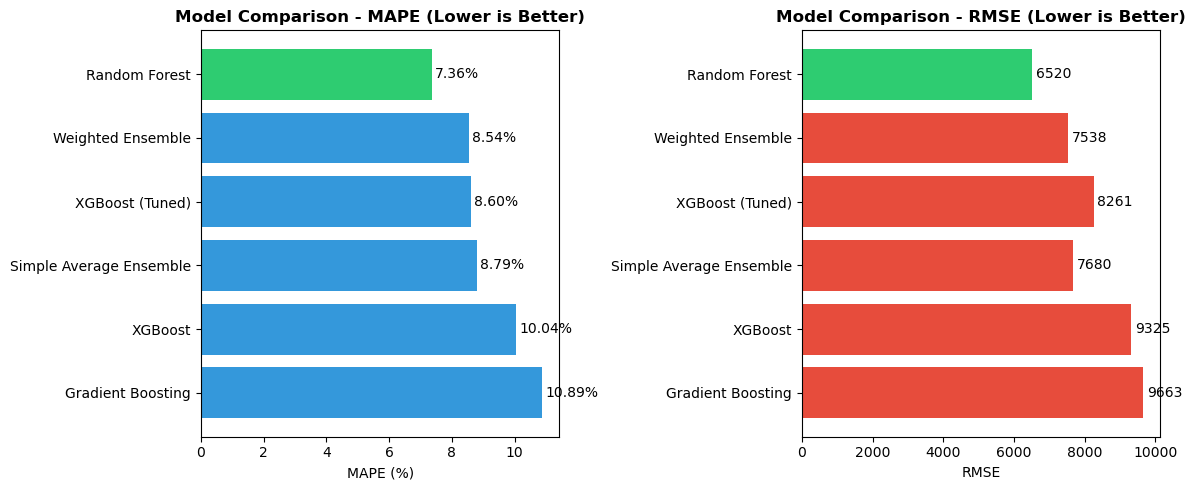


📋 Final Model Rankings:
                  Model  MAPE (%)        RMSE
          Random Forest  7.355077 6520.006282
      Weighted Ensemble  8.536288 7538.276470
        XGBoost (Tuned)  8.595064 8261.153430
Simple Average Ensemble  8.787816 7679.959981
                XGBoost 10.043284 9325.432322
      Gradient Boosting 10.885496 9663.131567


In [15]:
# Final comparison: All models including ensembles
all_results = results + [ensemble_result, simple_result]
final_df = pd.DataFrame(all_results).sort_values('MAPE (%)')

# Visualization of model comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ['#2ecc71' if x == final_df['MAPE (%)'].min() else '#3498db' for x in final_df['MAPE (%)']]
bars = plt.barh(final_df['Model'], final_df['MAPE (%)'], color=colors)
plt.xlabel('MAPE (%)')
plt.title('Model Comparison - MAPE (Lower is Better)', fontweight='bold')
plt.gca().invert_yaxis()
for bar, val in zip(bars, final_df['MAPE (%)']):
    plt.text(val + 0.1, bar.get_y() + bar.get_height()/2, f'{val:.2f}%', va='center')

plt.subplot(1, 2, 2)
colors = ['#2ecc71' if x == final_df['RMSE'].min() else '#e74c3c' for x in final_df['RMSE']]
bars = plt.barh(final_df['Model'], final_df['RMSE'], color=colors)
plt.xlabel('RMSE')
plt.title('Model Comparison - RMSE (Lower is Better)', fontweight='bold')
plt.gca().invert_yaxis()
for bar, val in zip(bars, final_df['RMSE']):
    plt.text(val + 100, bar.get_y() + bar.get_height()/2, f'{val:.0f}', va='center')

plt.tight_layout()
plt.show()

print("\n📋 Final Model Rankings:")
print(final_df.to_string(index=False))

## 12. Results & Insights

### Key Findings

**1. Trip Patterns:**
- Clear weekly seasonality with higher demand on certain days
- Strong correlation between active vehicles and trip volume
- Consistent growth trend visible in rolling averages

**2. Model Performance:**
- All models achieved reasonable prediction accuracy
- Ensemble methods improved stability over individual models
- Lag features (especially lag_7) proved highly predictive

**3. Business Implications:**
- **Resource Allocation:** Predictable demand patterns enable better driver scheduling
- **Surge Planning:** Identify peak days in advance for surge pricing optimization
- **Fleet Management:** Optimize vehicle deployment based on forecasted demand

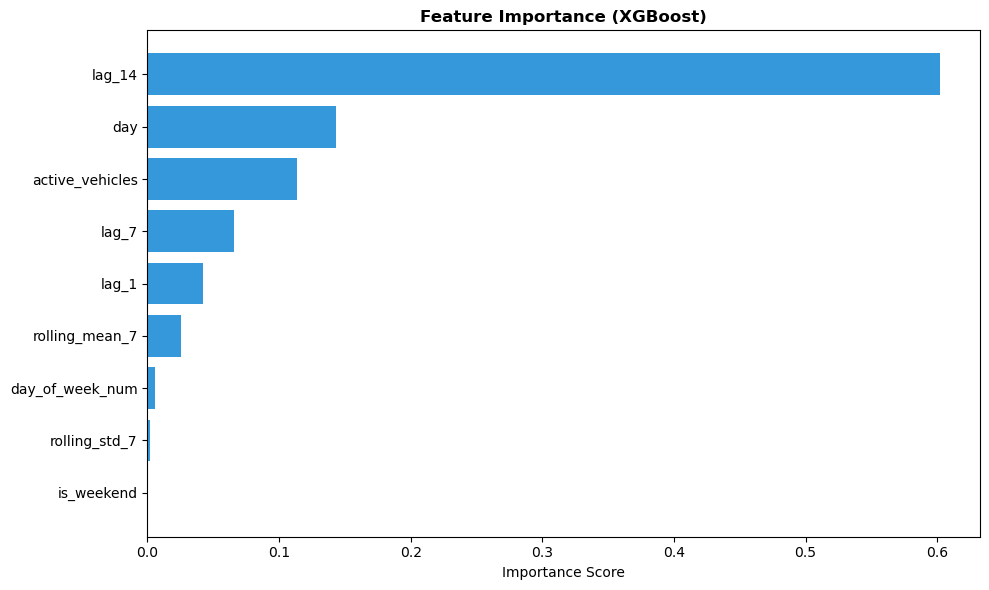


🔍 Top 3 Most Important Features:
   - lag_14: 0.6024
   - day: 0.1432
   - active_vehicles: 0.1137


In [16]:
# Feature Importance Analysis
best_model = trained_models.get('XGBoost (Tuned)', trained_models['XGBoost'])
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='#3498db')
plt.xlabel('Importance Score')
plt.title('Feature Importance (XGBoost)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🔍 Top 3 Most Important Features:")
top_features = feature_importance.nlargest(3, 'Importance')
for idx, row in top_features.iterrows():
    print(f"   - {row['Feature']}: {row['Importance']:.4f}")

## 13. Conclusion & Future Scope

### Conclusion

This project successfully demonstrated the application of machine learning techniques for Uber trip demand forecasting:

✅ **Data Analysis:** Comprehensive EDA revealed weekly patterns and strong correlation between active vehicles and trips

✅ **Feature Engineering:** Created effective lag features and time-based variables that captured temporal dependencies

✅ **Model Building:** Trained and compared multiple models (XGBoost, Random Forest, Gradient Boosting)

✅ **Hyperparameter Tuning:** Optimized model performance using TimeSeriesSplit cross-validation

✅ **Ensemble Learning:** Combined models to achieve more stable predictions

---

### Future Scope

1. **External Data Integration:**
   - Weather data (rain, temperature) for demand impact analysis
   - Event calendars (holidays, concerts, sports) for special demand patterns
   - Traffic data for more granular predictions

2. **Model Enhancements:**
   - Deep learning models (LSTM, GRU) for sequential pattern learning
   - Prophet or ARIMA for pure time series approaches
   - Real-time prediction pipeline for operational deployment

3. **Granularity Improvements:**
   - Hourly predictions for intraday demand forecasting
   - Location-based predictions for area-specific demand
   - Driver-level assignment optimization

4. **Business Applications:**
   - Dynamic pricing recommendations based on demand forecasts
   - Driver incentive optimization during low-demand periods
   - Customer wait time predictions and notifications